### Data Transformation
This notebook is used to transform the used data into RAG ready form

In [13]:
import os
import pandas as pd 
import ast

In [4]:
input_ordner = "data/Bundesliga/modified/GW"

In [5]:
gameweek = 32
team = "Wolfsburg"

directory = os.listdir(input_ordner + str(gameweek))

for fname in directory:
    if team in fname:
        print(fname)
        if "EventData" in fname:
            event_df = pd.read_csv(input_ordner + str(gameweek) + "/" + fname)
        elif "PlayerData" in fname:
            player_df = pd.read_csv(input_ordner + str(gameweek) + "/" + fname)

2023_2024_Bundesliga_GW32_Wolfsburg - Darmstadt_EventData.csv
2023_2024_Bundesliga_GW32_Wolfsburg - Darmstadt_PlayerData.csv


In [37]:
event_df[event_df["type"] == "TakeOn"][['eventId', 'teamId','teamName', 'playerId', 'type', 'simplified_qualifiers', 'minute', 'second']]

,eventId,teamId,teamName,playerId,type,simplified_qualifiers,minute,second
21,8,1147,Darmstadt,379171.0,TakeOn,"{'displayNames': ['Zone', 'Offensive', 'Opposi...",0,33.0
81,46,33,Wolfsburg,363652.0,TakeOn,"{'displayNames': ['StandingSave', 'Offensive',...",3,15.0
87,51,33,Wolfsburg,393083.0,TakeOn,"{'displayNames': ['Zone', 'StandingSave', 'Off...",3,32.0
90,40,1147,Darmstadt,379171.0,TakeOn,"{'displayNames': ['Zone', 'OppositeRelatedEven...",3,35.0
156,70,1147,Darmstadt,442306.0,TakeOn,"{'displayNames': ['StandingSave', 'OppositeRel...",9,3.0
158,370,1147,Darmstadt,442306.0,TakeOn,"{'displayNames': ['Zone', 'OppositeRelatedEven...",9,4.0
173,110,33,Wolfsburg,369887.0,TakeOn,"{'displayNames': ['OppositeRelatedEvent', 'Off...",9,56.0
288,187,33,Wolfsburg,418589.0,TakeOn,"{'displayNames': ['OppositeRelatedEvent', 'Sta...",16,53.0
332,219,33,Wolfsburg,425018.0,TakeOn,"{'displayNames': ['OppositeRelatedEvent', 'Zon...",18,39.0
446,178,1147,Darmstadt,377269.0,TakeOn,"{'displayNames': ['StandingSave', 'Zone', 'Off...",25,28.0


#### Step 1: Inspect the Data

In [35]:
print("Columns in the Event DataFrame:")
print(event_df.columns)

Columns in the Event DataFrame:
Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'eventId', 'minute', 'second',
       'teamId', 'x', 'y', 'expandedMinute', 'period', 'type', 'outcomeType',
       'qualifiers', 'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX',
       'endY', 'blockedX', 'blockedY', 'goalMouthZ', 'goalMouthY', 'isShot',
       'relatedEventId', 'relatedPlayerId', 'isGoal_x', 'cardType_x',
       'isGoal_y', 'cardType_y', 'x1_bin_xT', 'y1_bin_xT', 'x2_bin_xT',
       'y2_bin_xT', 'start_zone_value_xT', 'end_zone_value_xT', 'xT',
       'teamName', 'shirtNo', 'name', 'position', 'isFirstEleven', 'pro',
       'shortName'],
      dtype='object')


In [36]:
event_df['type'].unique()

array(['Start', 'Pass', 'BallTouch', 'BallRecovery', 'Clearance', 'Foul',
       'BlockedPass', 'SavedShot', 'Save', 'KeeperPickup', 'Aerial',
       'Punch', 'TakeOn', 'Tackle', 'Interception', 'Dispossessed',
       'MissedShots', 'Challenge', 'CornerAwarded', 'Claim', 'Goal',
       'ShieldBallOpp', 'End', 'Smother', 'Card', 'SubstitutionOff',
       'SubstitutionOn', 'FormationChange', 'OffsideGiven', 'OffsidePass',
       'OffsideProvoked', 'ShotOnPost', 'KeeperSweeper', 'FormationSet'],
      dtype=object)

In [37]:
event_df['qualifiers'][event_df['type'] == 'FormationChange'].iloc[0]

"[{'type': {'value': 194, 'displayName': 'CaptainPlayerId'}, 'value': '104917'}, {'type': {'value': 130, 'displayName': 'TeamFormation'}, 'value': '13'}, {'type': {'value': 131, 'displayName': 'TeamPlayerFormation'}, 'value': '1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0'}, {'type': {'value': 30, 'displayName': 'InvolvedPlayers'}, 'value': '104885,296769,330538,415172,372855,104917,80994,262856,363618,132943,261212,141716,369979,143600,401385,145269,397893'}, {'type': {'value': 44, 'displayName': 'PlayerPosition'}, 'value': '1, 3, 3, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5'}, {'type': {'value': 59, 'displayName': 'JerseyNumber'}, 'value': '21, 39, 22, 23, 2, 4, 44, 24, 17, 9, 7, 10, 14, 16, 18, 25, 38'}]"

In [38]:
event_df

,Unnamed: 0.1,Unnamed: 0,id,eventId,minute,second,teamId,x,y,expandedMinute,...,start_zone_value_xT,end_zone_value_xT,xT,teamName,shirtNo,name,position,isFirstEleven,pro,shortName
0,0,0,2.578848e+09,2,0,0.0,36,0.0,0.0,0,...,NaN,NaN,NaN,Leverkusen,NaN,NaN,NaN,NaN,0.000000,NaN
1,1,1,2.578848e+09,2,0,0.0,7614,0.0,0.0,0,...,NaN,NaN,NaN,RBL,NaN,NaN,NaN,NaN,0.000000,NaN
2,2,2,2.578848e+09,3,0,0.0,7614,50.1,49.9,0,...,0.016895,0.014846,-0.002049,RBL,NaN,NaN,NaN,NaN,-4.729853,NaN
3,3,3,2.578848e+09,4,0,1.0,7614,45.6,53.1,0,...,0.014846,0.012483,-0.002363,RBL,NaN,NaN,NaN,NaN,-8.742348,NaN
4,4,4,2.578848e+09,5,0,4.0,7614,43.2,9.1,0,...,0.012483,0.011105,-0.001379,RBL,NaN,NaN,NaN,NaN,-10.044603,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,1613,1613,2.579019e+09,943,95,50.0,7614,0.0,0.0,99,...,NaN,NaN,NaN,RBL,NaN,NaN,NaN,NaN,0.000000,NaN
1614,1614,1614,2.579019e+09,821,0,0.0,36,0.0,0.0,9,...,NaN,NaN,NaN,Leverkusen,NaN,NaN,NaN,NaN,0.000000,NaN
1615,1615,1615,2.579019e+09,944,0,0.0,7614,0.0,0.0,9,...,NaN,NaN,NaN,RBL,NaN,NaN,NaN,NaN,0.000000,NaN
1616,1616,1616,2.578815e+09,1,0,0.0,7614,0.0,0.0,0,...,NaN,NaN,NaN,RBL,NaN,NaN,NaN,NaN,0.000000,NaN


In [39]:
event_df[event_df['type'] == 'Pass'].iloc[0]


Unnamed: 0.1                                                            2
Unnamed: 0                                                              2
id                                                           2578848441.0
eventId                                                                 3
minute                                                                  0
second                                                                0.0
teamId                                                               7614
x                                                                    50.1
y                                                                    49.9
expandedMinute                                                          0
period                                                          FirstHalf
type                                                                 Pass
outcomeType                                                    Successful
qualifiers              [{'type': {'va

In [40]:
def evaluate_features(df):
    """
    Evaluates the features in a given DataFrame by examining the number of unique values and the number of missing values.

    Parameters:
        df: DataFrame to evaluate.
    Returns:
        DataFrame that contains the unique value count and missing value count for each feature.
    """
    feature_evaluation = pd.DataFrame({
        'Unique Values': df.nunique(),
        'Missing Values': df.isnull().sum()
    })
    return feature_evaluation


In [41]:
evaluate_features(event_df)

,Unique Values,Missing Values
Unnamed: 0.1,1618,0
Unnamed: 0,1618,0
id,1618,0
eventId,929,0
minute,93,0
second,60,2
teamId,2,0
x,726,0
y,715,0
expandedMinute,97,0


#### Step 2: Explore  Event Types

Step 2.1: Unique Event Types

In [42]:
print("Unique Event Types:")
print(event_df['type'].value_counts())

Unique Event Types:
type
Pass               1072
BallRecovery        108
BallTouch            57
Aerial               50
Foul                 46
TakeOn               42
Tackle               31
Clearance            27
Challenge            20
CornerAwarded        18
BlockedPass          17
Interception         16
Dispossessed         14
Save                 13
SavedShot            13
KeeperPickup         12
SubstitutionOn        9
SubstitutionOff       9
End                   6
MissedShots           6
Goal                  5
Start                 4
Claim                 3
Card                  3
OffsideProvoked       2
ShieldBallOpp         2
FormationSet          2
FormationChange       2
OffsideGiven          2
OffsidePass           2
KeeperSweeper         2
Punch                 1
Smother               1
ShotOnPost            1
Name: count, dtype: int64


In [43]:
def evaluate_features_by_event_type(df, event_type_column):
    """
    Evaluates features in the DataFrame by examining the correlation between missing values and event types.
    
    Parameters:
        df: DataFrame to evaluate.
        event_type_column: Name of the column indicating the type of event.
    
    Returns:
        Dictionary where keys are event types and values are DataFrames showing the 
        percentage of missing values for each feature specific to that event type.
    """
    # Ensure the event_type_column exists in the DataFrame
    if event_type_column not in df.columns:
        raise ValueError(f"The column '{event_type_column}' does not exist in the DataFrame.")
    
    # Dictionary to store the missing value analysis for each event type
    results = {}
    
    # Iterate through each unique event type
    for event_type in df[event_type_column].unique():
        # Filter the DataFrame for the current event type
        subset = df[df[event_type_column] == event_type]
        
        # Compute the percentage of missing values for each column
        missing_percentage = subset.isnull().mean() * 100
        
        # Store the result in the dictionary
        results[event_type] = missing_percentage
    
    return results

In [44]:
evaluation_results = evaluate_features_by_event_type(event_df, 'type')

In [45]:
evaluation_results.keys()

dict_keys(['Start', 'Pass', 'BallTouch', 'BallRecovery', 'Clearance', 'Foul', 'BlockedPass', 'SavedShot', 'Save', 'KeeperPickup', 'Aerial', 'Punch', 'TakeOn', 'Tackle', 'Interception', 'Dispossessed', 'MissedShots', 'Challenge', 'CornerAwarded', 'Claim', 'Goal', 'ShieldBallOpp', 'End', 'Smother', 'Card', 'SubstitutionOff', 'SubstitutionOn', 'FormationChange', 'OffsideGiven', 'OffsidePass', 'OffsideProvoked', 'ShotOnPost', 'KeeperSweeper', 'FormationSet'])

In [46]:
evaluation_results['Pass']

Unnamed: 0.1              0.000000
Unnamed: 0                0.000000
id                        0.000000
eventId                   0.000000
minute                    0.000000
second                    0.000000
teamId                    0.000000
x                         0.000000
y                         0.000000
expandedMinute            0.000000
period                    0.000000
type                      0.000000
outcomeType               0.000000
qualifiers                0.000000
satisfiedEventsTypes      0.000000
isTouch                   0.000000
playerId                  0.000000
endX                      0.000000
endY                      0.000000
blockedX                100.000000
blockedY                100.000000
goalMouthZ              100.000000
goalMouthY              100.000000
isShot                  100.000000
relatedEventId          100.000000
relatedPlayerId         100.000000
isGoal_x                100.000000
cardType_x              100.000000
isGoal_y            

In [47]:
event_df[event_df['type'] == 'Pass']['qualifiers'].iloc[0],event_df[event_df['type'] == 'Pass']['qualifiers'].iloc[1],event_df[event_df['type'] == 'Pass']['qualifiers'].iloc[2]

("[{'type': {'value': 140, 'displayName': 'PassEndX'}, 'value': '45.6'}, {'type': {'value': 213, 'displayName': 'Angle'}, 'value': '2.97'}, {'type': {'value': 212, 'displayName': 'Length'}, 'value': '4.8'}, {'type': {'value': 141, 'displayName': 'PassEndY'}, 'value': '51.1'}, {'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Back'}, {'type': {'value': 178, 'displayName': 'StandingSave'}}]",
 "[{'type': {'value': 212, 'displayName': 'Length'}, 'value': '30.0'}, {'type': {'value': 178, 'displayName': 'StandingSave'}}, {'type': {'value': 213, 'displayName': 'Angle'}, 'value': '4.62'}, {'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Back'}, {'type': {'value': 141, 'displayName': 'PassEndY'}, 'value': '9.1'}, {'type': {'value': 140, 'displayName': 'PassEndX'}, 'value': '43.1'}]",
 "[{'type': {'value': 213, 'displayName': 'Angle'}, 'value': '2.44'}, {'type': {'value': 140, 'displayName': 'PassEndX'}, 'value': '29.3'}, {'type': {'value': 141, 'displayName': 'PassEndY'}, 'value

In [48]:
event_df[event_df['type'] == 'Pass']['qualifiers'].iloc[0]

"[{'type': {'value': 140, 'displayName': 'PassEndX'}, 'value': '45.6'}, {'type': {'value': 213, 'displayName': 'Angle'}, 'value': '2.97'}, {'type': {'value': 212, 'displayName': 'Length'}, 'value': '4.8'}, {'type': {'value': 141, 'displayName': 'PassEndY'}, 'value': '51.1'}, {'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Back'}, {'type': {'value': 178, 'displayName': 'StandingSave'}}]"

In [49]:
event_df[event_df['type'] == 'Pass']['qualifiers'].head(1).explode()   

2    [{'type': {'value': 140, 'displayName': 'PassE...
Name: qualifiers, dtype: object

Step 2.2: Satisfied Event Types

In [50]:
print("Satisfied Event Types:")
print(event_df['satisfiedEventsTypes'].value_counts())

Satisfied Event Types:
satisfiedEventsTypes
[93]                                                     120
[91, 117, 30, 35, 38, 215, 218]                           64
[91, 119, 117, 30, 36, 38, 216, 218]                      64
[91, 117, 30, 35, 37, 216, 218]                           61
[91, 117, 30, 36, 37, 216, 218]                           58
                                                        ... 
[91, 137, 126, 35, 37, 217, 218]                           1
[91, 119, 117, 30, 205, 31, 32, 34, 35, 37, 217, 218]      1
[91, 119, 117, 30, 123, 205, 40, 46, 38, 217, 218]         1
[91, 9, 10, 2, 3, 12]                                      1
[91, 36, 38, 215, 218]                                     1
Name: count, Length: 222, dtype: int64


What are these supposed to mean? 

#### Step 3: Analyze "qualifiers"

In [51]:
event_df['qualifiers'][2]

"[{'type': {'value': 140, 'displayName': 'PassEndX'}, 'value': '45.6'}, {'type': {'value': 213, 'displayName': 'Angle'}, 'value': '2.97'}, {'type': {'value': 212, 'displayName': 'Length'}, 'value': '4.8'}, {'type': {'value': 141, 'displayName': 'PassEndY'}, 'value': '51.1'}, {'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Back'}, {'type': {'value': 178, 'displayName': 'StandingSave'}}]"

We find a completely nested object. A list that holds multiple dictionary objects that in turn hold dictionaries

In [52]:
import ast

# Convert 'qualifiers' column from string to list of dictionaries
event_df['qualifiers'] = event_df['qualifiers'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [53]:
from pandas import json_normalize

# Explode the 'qualifiers' column into separate rows
event_df_exploded = event_df.explode('qualifiers').reset_index(drop=True)

# Normalize the qualifiers column to create separate columns for 'type' and 'value'
qualifiers_normalized = json_normalize(event_df_exploded['qualifiers'])

# Combine normalized qualifiers with the original data
event_df_cleaned = pd.concat([event_df_exploded.drop(columns=['qualifiers']), qualifiers_normalized], axis=1)

# Rename columns for clarity
event_df_cleaned = event_df_cleaned.rename(columns={
    'type.value': 'qualifier_type_value',
    'type.displayName': 'qualifier_type_name',
    'value': 'qualifier_value'
})

In [54]:
event_df_cleaned.head()

,Unnamed: 0.1,Unnamed: 0,id,eventId,minute,second,teamId,x,y,expandedMinute,...,teamName,shirtNo,name,position,isFirstEleven,pro,shortName,qualifier_value,qualifier_type_value,qualifier_type_name
0,0,0,2.578848e+09,2,0,0.0,36,0.0,0.0,0,...,Leverkusen,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
1,1,1,2.578848e+09,2,0,0.0,7614,0.0,0.0,0,...,RBL,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2,2,2,2.578848e+09,3,0,0.0,7614,50.1,49.9,0,...,RBL,NaN,NaN,NaN,NaN,-4.729853,NaN,45.6,140.0,PassEndX
3,2,2,2.578848e+09,3,0,0.0,7614,50.1,49.9,0,...,RBL,NaN,NaN,NaN,NaN,-4.729853,NaN,2.97,213.0,Angle
4,2,2,2.578848e+09,3,0,0.0,7614,50.1,49.9,0,...,RBL,NaN,NaN,NaN,NaN,-4.729853,NaN,4.8,212.0,Length


In [55]:
# Filter DataFrame for a specific eventId
specific_event_id = 30  
filtered_events = event_df_cleaned[event_df_cleaned['eventId'] == specific_event_id]

print(f"The type of Event: {filtered_events['type'].iloc[0]}.")

# Display the filtered events
filtered_events


The type of Event: Pass.


,Unnamed: 0.1,Unnamed: 0,id,eventId,minute,second,teamId,x,y,expandedMinute,...,teamName,shirtNo,name,position,isFirstEleven,pro,shortName,qualifier_value,qualifier_type_value,qualifier_type_name
170,32,32,2.578850e+09,30,1,30.0,7614,8.0,51.9,1,...,RBL,NaN,NaN,NaN,NaN,0.000000,NaN,22.5,212.0,Length
171,32,32,2.578850e+09,30,1,30.0,7614,8.0,51.9,1,...,RBL,NaN,NaN,NaN,NaN,0.000000,NaN,1.49,213.0,Angle
172,32,32,2.578850e+09,30,1,30.0,7614,8.0,51.9,1,...,RBL,NaN,NaN,NaN,NaN,0.000000,NaN,Back,56.0,Zone
173,32,32,2.578850e+09,30,1,30.0,7614,8.0,51.9,1,...,RBL,NaN,NaN,NaN,NaN,0.000000,NaN,9.8,140.0,PassEndX
174,32,32,2.578850e+09,30,1,30.0,7614,8.0,51.9,1,...,RBL,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,178.0,StandingSave
175,32,32,2.578850e+09,30,1,30.0,7614,8.0,51.9,1,...,RBL,NaN,NaN,NaN,NaN,0.000000,NaN,84.8,141.0,PassEndY
365,74,74,2.578851e+09,30,3,2.0,36,88.9,8.5,3,...,Leverkusen,NaN,NaN,NaN,NaN,5.478153,NaN,5.6,212.0,Length
366,74,74,2.578851e+09,30,3,2.0,36,88.9,8.5,3,...,Leverkusen,NaN,NaN,NaN,NaN,5.478153,NaN,1.00,213.0,Angle
367,74,74,2.578851e+09,30,3,2.0,36,88.9,8.5,3,...,Leverkusen,NaN,NaN,NaN,NaN,5.478153,NaN,91.8,140.0,PassEndX
368,74,74,2.578851e+09,30,3,2.0,36,88.9,8.5,3,...,Leverkusen,NaN,NaN,NaN,NaN,5.478153,NaN,Right,56.0,Zone


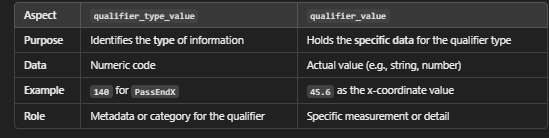

In [56]:
qualifier_interest = 'PassEndX'  # Replace with a qualifier type of interest
filtered_events = event_df_cleaned[event_df_cleaned['qualifier_type_name'] == qualifier_interest]
print(f"\nEvents with Qualifier '{qualifier_interest}':")
print(filtered_events[['eventId', 'name', 'qualifier_value']].head(10))


Events with Qualifier 'PassEndX':
    eventId  name qualifier_value
2         3   NaN            45.6
13        4   NaN            43.1
15        5   NaN            29.3
21        6   NaN            29.3
31        7   NaN            31.7
36        8   NaN            40.0
44        9   NaN            66.6
52        4   NaN            27.9
58       12   NaN            69.5
64       13   NaN            69.1


#### Step 4: Summarize Qualifier Data

In [57]:
# Step 4: Summarize Qualifier Data
print("Top 10 Most Common Qualifiers:")
print(event_df_cleaned['qualifier_type_name'].value_counts().head(10))


Top 10 Most Common Qualifiers:
qualifier_type_name
Zone                    1457
StandingSave            1213
PassEndX                1099
PassEndY                1099
Length                  1097
Angle                   1097
OppositeRelatedEvent     287
Offensive                124
Defensive                116
Chipped                   90
Name: count, dtype: int64


In [58]:
print("Examples of Qualifiers by Event Type:")
event_type = 'Pass'  # Replace with any event type of interest
example_qualifiers = event_df_cleaned[event_df_cleaned['type'] == event_type][['qualifier_type_name', 'qualifier_value']].drop_duplicates()
print(example_qualifiers.head(10))


Examples of Qualifiers by Event Type:
   qualifier_type_name qualifier_value
2             PassEndX            45.6
3                Angle            2.97
4               Length             4.8
5             PassEndY            51.1
6                 Zone            Back
7         StandingSave             NaN
8               Length            30.0
10               Angle            4.62
12            PassEndY             9.1
13            PassEndX            43.1


#### Step 5: Key Statistics and Distributions

In [59]:
print("\nBasic Event Statistics:")
print(event_df.describe())


Basic Event Statistics:
       Unnamed: 0.1   Unnamed: 0            id       eventId       minute  \
count   1618.000000  1618.000000  1.618000e+03   1618.000000  1618.000000   
mean     808.500000   808.500000  2.578925e+09    460.061805    46.297281   
std      467.220683   467.220683  6.072983e+04    473.620801    28.653540   
min        0.000000     0.000000  2.578815e+09      1.000000     0.000000   
25%      404.250000   404.250000  2.578865e+09    219.250000    20.000000   
50%      808.500000   808.500000  2.578937e+09    446.000000    46.000000   
75%     1212.750000  1212.750000  2.578978e+09    668.750000    73.000000   
max     1617.000000  1617.000000  2.579192e+09  11753.000000    95.000000   

            second       teamId            x            y  expandedMinute  \
count  1616.000000  1618.000000  1618.000000  1618.000000     1618.000000   
mean     29.277847  4091.962917    44.319901    48.094067       48.325711   
std      17.582750  3780.752070    24.670237    28